In [1]:
### set environment
import numpy as np
import pandas as pd
import argparse
import os

from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA

# Dimension reduction and clustering libraries
import umap
import phenograph

import matplotlib.pyplot as plt

In [2]:
txt_fdiry = "/mount/repo/Proj_ENCODE_FCC/results/region_annotation/fcc_astarr_macs_input_overlap/summary2"
txt_fname = "matrix.annotation.prepare.cres_vote1_gcfilter.chipseq_full.fcc.tss.tsv"
txt_fpath = os.path.join(txt_fdiry, txt_fname)

mat = pd.read_csv(txt_fpath, sep="\t")
vec = mat.Region
mat = mat.set_index('Region')

mat_region_annot_fcc = mat
print(mat.shape)
mat.head()

(87610, 536)


,ASTARR_A,WSTARR_A,LMPRA_A,TMPRA_A,ASTARR_R,WSTARR_R,LMPRA_R,TMPRA_R,CRISPRi-HCRFF:CASA,CRISPRi-Growth:Signif,...,ZNF778,ZNF780A,ZNF785,ZNF79,ZNF83,ZNF830,ZNF84,ZSCAN29,ZSCAN32,ZZZ3
Region,,,,,,,,,,,,,,,,,,,,,
chr1:10038-10405,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr1:16025-16338,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr1:115429-115969,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
chr1:184091-184563,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr1:186343-187136,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
X = mat_region_annot_fcc.to_numpy()
X.shape

(87610, 536)

/opt/conda/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


CPU times: user 3min 19s, sys: 29.5 s, total: 3min 48s
Wall time: 2min 51s


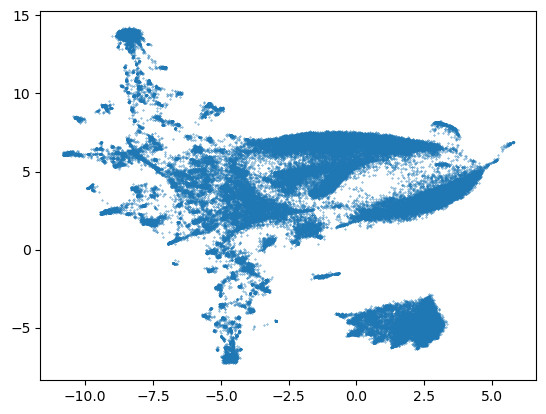

In [4]:
%%time
X_ump_n15 = umap.UMAP(n_neighbors=15, metric = "manhattan", random_state=123).fit_transform(X)
plt.scatter(X_ump_n15[:, 0], X_ump_n15[:, 1], s=0.1)

/opt/conda/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


CPU times: user 5min 24s, sys: 1min 5s, total: 6min 29s
Wall time: 4min 36s


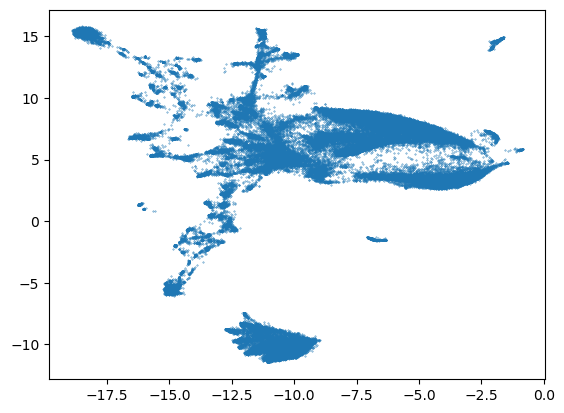

In [5]:
%%time
X_ump_n30 = umap.UMAP(n_neighbors=30, metric = "manhattan", random_state=123).fit_transform(X)
plt.scatter(X_ump_n30[:, 0], X_ump_n30[:, 1], s=0.1)

/opt/conda/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


CPU times: user 7min 23s, sys: 1min 39s, total: 9min 2s
Wall time: 6min 18s


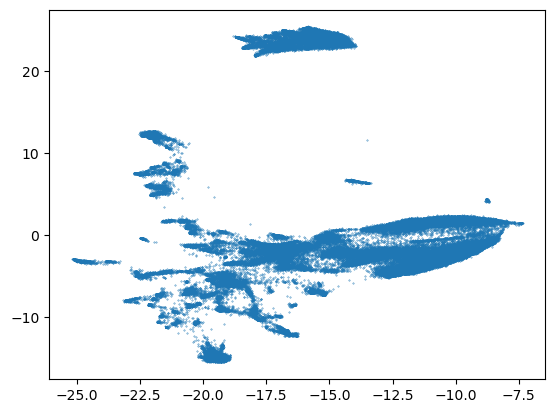

In [6]:
%%time
X_ump_n50 = umap.UMAP(n_neighbors=50, metric = "manhattan", min_dist = 0.15, random_state=123).fit_transform(X)
plt.scatter(X_ump_n50[:, 0], X_ump_n50[:, 1], s=0.1)

/opt/conda/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


CPU times: user 7min 41s, sys: 1min 52s, total: 9min 33s
Wall time: 6min 23s


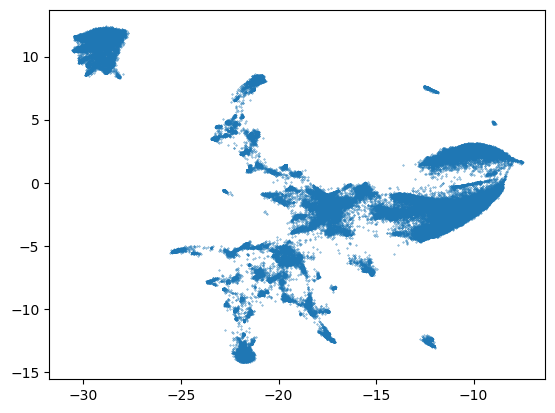

In [7]:
%%time
X_ump_n50 = umap.UMAP(n_neighbors=50, metric = "manhattan", random_state=123).fit_transform(X)
plt.scatter(X_ump_n50[:, 0], X_ump_n50[:, 1], s=0.1)

/opt/conda/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


CPU times: user 9min 55s, sys: 2min 27s, total: 12min 22s
Wall time: 8min 17s


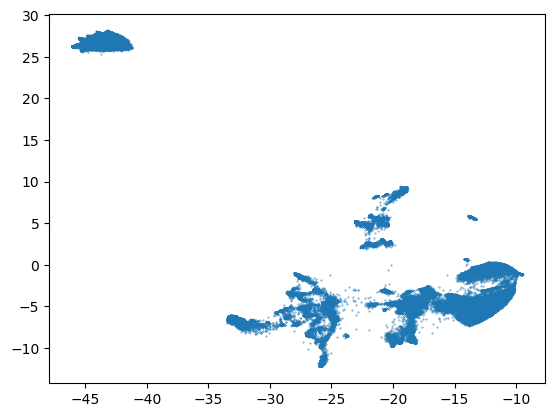

In [9]:
%%time
X_ump_n70 = umap.UMAP(n_neighbors=70, metric = "manhattan", random_state=123).fit_transform(X)
plt.scatter(X_ump_n70[:, 0], X_ump_n70[:, 1], s=0.1)

/opt/conda/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


CPU times: user 12min 18s, sys: 3min 3s, total: 15min 21s
Wall time: 10min 27s


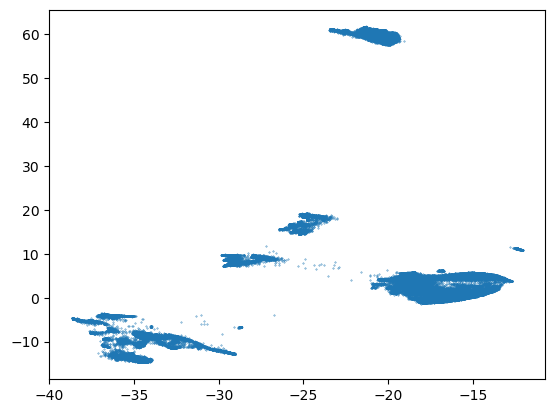

In [8]:
%%time
X_ump_n90 = umap.UMAP(n_neighbors=90, metric = "manhattan", random_state=123).fit_transform(X)
plt.scatter(X_ump_n90[:, 0], X_ump_n90[:, 1], s=0.1)

In [51]:
y1 = mat_region_annot_fcc.loc[:,"CTCF"].to_numpy().astype(int)
y  = y1
i  = y == 1

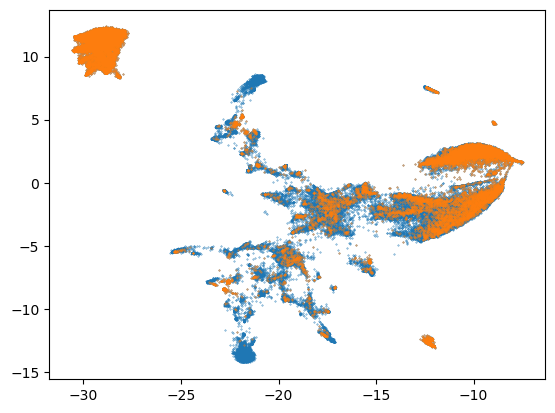

In [52]:
X_ump = X_ump_n50
plt.scatter(X_ump[:, 0], X_ump[:, 1], s=0.1)
plt.scatter(X_ump[i, 0], X_ump[i, 1], s=0.1)
plt.show()

In [53]:
y1 = mat_region_annot_fcc.loc[:,"CTCF"].to_numpy().astype(int)
y2 = mat_region_annot_fcc.loc[:,"SMC3"].to_numpy().astype(int)
y  = y1 * y2
i  = y == 1

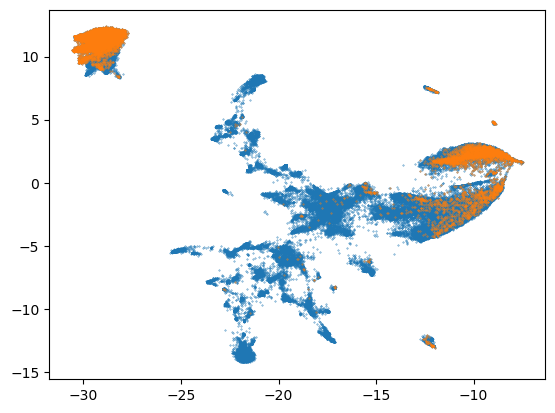

In [54]:
X_ump = X_ump_n50
plt.scatter(X_ump[:, 0], X_ump[:, 1], s=0.1)
plt.scatter(X_ump[i, 0], X_ump[i, 1], s=0.1)
plt.show()

In [55]:
y1 = mat_region_annot_fcc.loc[:,"CTCF"].to_numpy().astype(int)
y2 = mat_region_annot_fcc.loc[:,"SMC3"].to_numpy().astype(int)
y3 = mat_region_annot_fcc.loc[:,"RAD21"].to_numpy().astype(int)
y  = y1 * y2 * y3
i  = y == 1

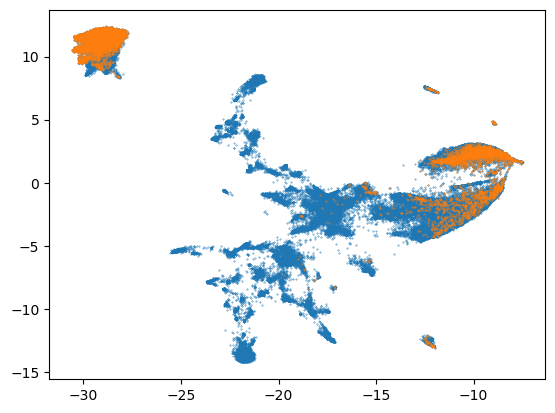

In [56]:
X_ump = X_ump_n50
plt.scatter(X_ump[:, 0], X_ump[:, 1], s=0.1)
plt.scatter(X_ump[i, 0], X_ump[i, 1], s=0.1)
plt.show()

In [13]:
%%time
communities, graph, Q = phenograph.cluster(X, k=50, primary_metric="manhattan")

Finding 50 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 847.3792743682861 seconds
Jaccard graph constructed in 21.52340865135193 seconds
Wrote graph to binary file in 3.0084002017974854 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.903613
Louvain completed 21 runs in 97.38852262496948 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 971.991593837738 seconds
CPU times: user 1h 59min 4s, sys: 1min 23s, total: 2h 28s
Wall time: 16min 11s


In [15]:
pd.Series(communities).describe()

count    87610.000000
mean         8.263075
std         10.357197
min         -1.000000
25%          1.000000
50%          3.000000
75%         12.000000
max         46.000000
dtype: float64

In [17]:
vec = pd.Series(communities)
res = vec.value_counts()
print(res)

 0     15633
 1     12718
 2      9102
 3      6425
 4      4213
 5      3406
 6      2879
 7      2516
 8      2149
 9      2048
 10     1726
 11     1635
 12     1600
 13     1500
 14     1345
 15     1185
 16     1149
 17     1107
 18     1078
 19     1077
 20     1065
 21      986
 22      896
 23      785
 24      658
 25      655
 26      621
 27      588
 28      583
 29      566
 30      498
 31      473
 33      441
 32      441
 34      439
 35      432
 36      426
 37      352
 38      347
 39      287
 40      275
 41      272
 42      235
 43      231
 44      190
 45      166
 46      136
-1        75
Name: count, dtype: int64


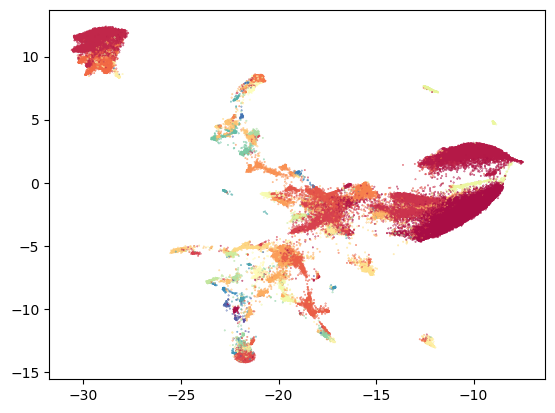

In [14]:
X_ump = X_ump_n50
plt.scatter(X_ump[:, 0], X_ump[:, 1], s=0.1, c=communities.astype(int), cmap='Spectral')
plt.show()

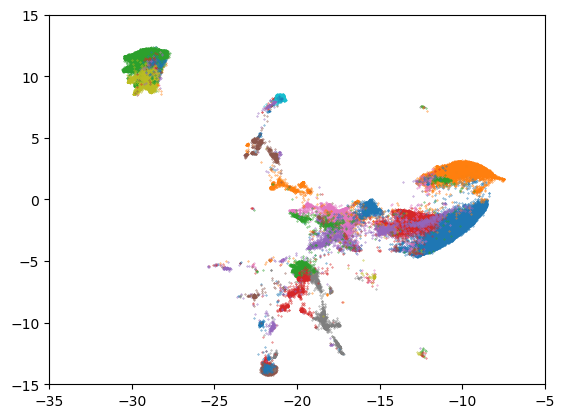

In [40]:
for i in range(16):
    idx = (communities.astype(int) == i)
    plt.scatter(X_ump[idx, 0], X_ump[idx, 1], s=0.1)
    plt.axis([-35, -5, -15, 15])

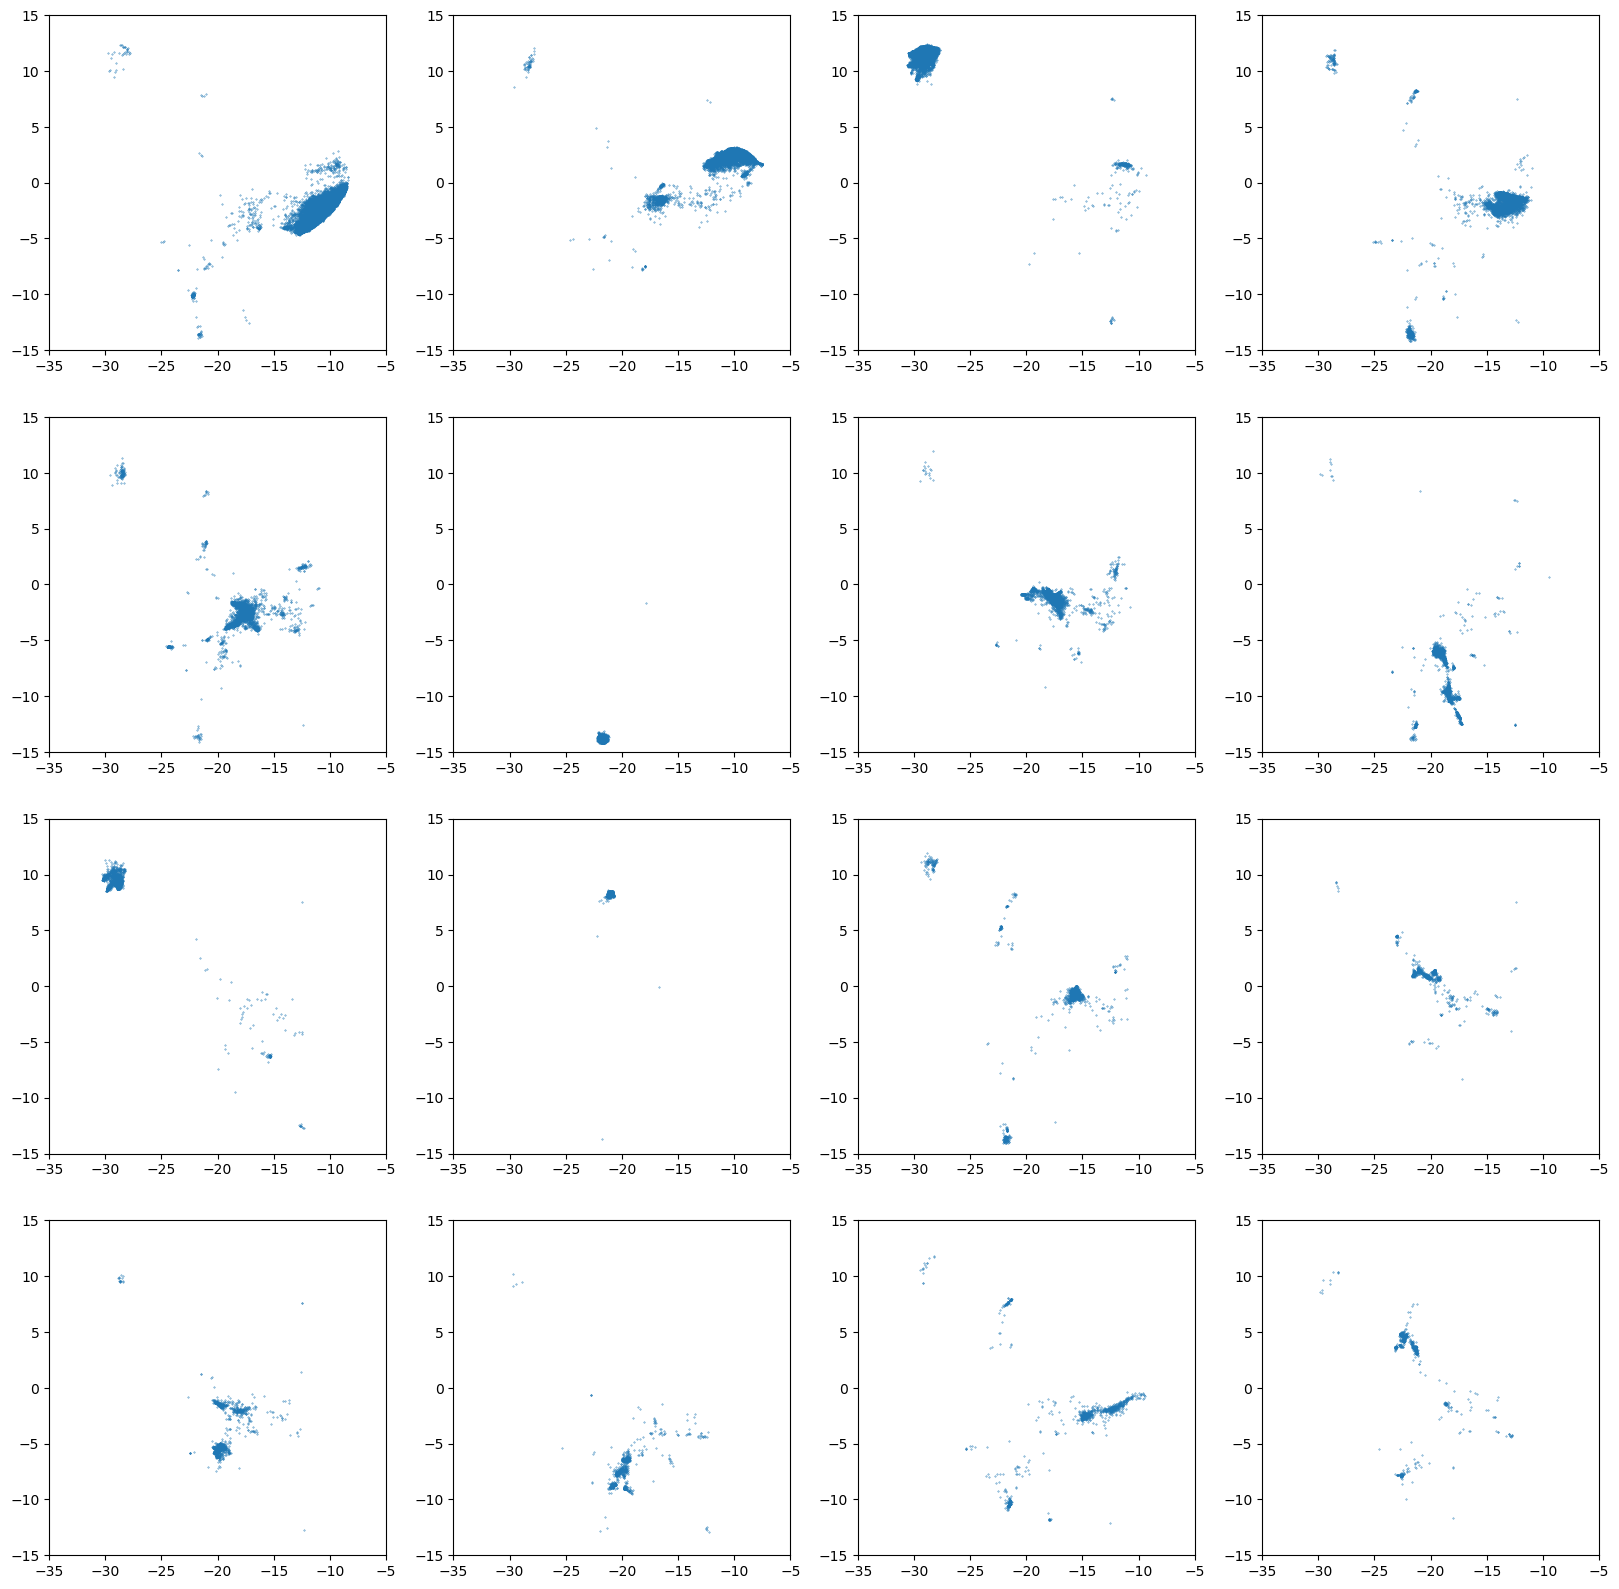

In [39]:
fig, axes = plt.subplots(4, 4, figsize = (20, 20))
axes = np.ravel(axes)
for i, ax in zip(range(16), axes):
    idx = (communities.astype(int) == i)
    ax.scatter(X_ump[idx, 0], X_ump[idx, 1], s=0.1)
    ax.set_xlim([-35, -5])
    ax.set_ylim([-15, 15])

In [50]:
txt_fdiry = "/mount/repo/Proj_ENCODE_FCC/results/region_annotation/fcc_astarr_macs_input_overlap/summary2"
txt_fname = "umap.cluster.tsv"
txt_fpath = os.path.join(txt_fdiry, txt_fname)

dct = dict()
dct["Region"]  = mat_region_annot_fcc.index.to_numpy()
dct["UMAP1"]   = X_ump_n50[:,0]
dct["UMAP2"]   = X_ump_n50[:,1]
dct["Cluster"] = communities.astype(int)

dat = pd.DataFrame(dct)
dat.to_csv(txt_fpath, sep = "\t", index=False)

In [32]:
%%time
communities, graph, Q = phenograph.cluster(X, k=50, primary_metric="manhattan", clustering_algo="leiden")

Finding 50 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 57.22820043563843 seconds
Jaccard graph constructed in 6.156347990036011 seconds
Running Leiden optimization
Leiden completed in 31.70678472518921 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 99.2834951877594 seconds
CPU times: user 8min 14s, sys: 8.6 s, total: 8min 23s
Wall time: 1min 39s


In [33]:
communities.astype(int)

array([2, 1, 7, ..., 3, 0, 1])

In [34]:
pd.Series(communities).describe()

count    22517.000000
mean         3.679620
std          3.386727
min          0.000000
25%          1.000000
50%          3.000000
75%          6.000000
max         14.000000
dtype: float64

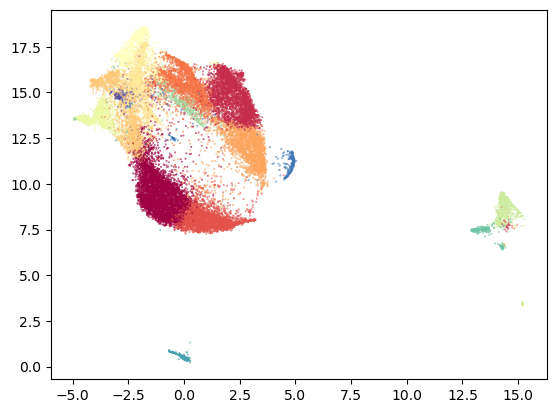

In [35]:
plt.scatter(X_ump[:, 0], X_ump[:, 1], s=0.1, c=communities.astype(int), cmap='Spectral')
plt.show()

In [31]:
cmap = plt.get_cmap('Spectral')
num_colors = cmap.N

print(num_colors)

256


In [26]:
communities.astype(int) == 0

array([False, False, False, ..., False,  True, False])

0


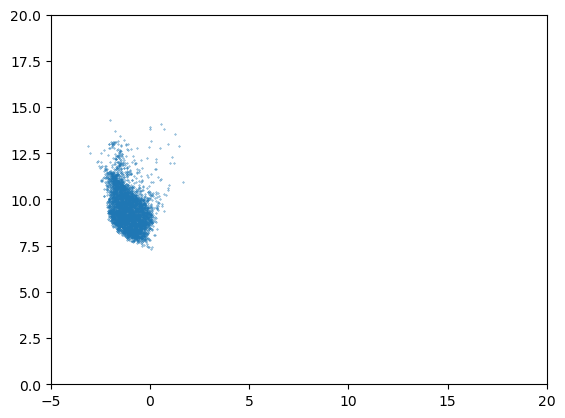

1


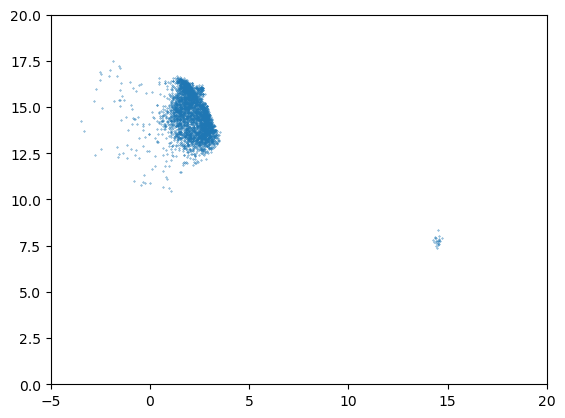

2


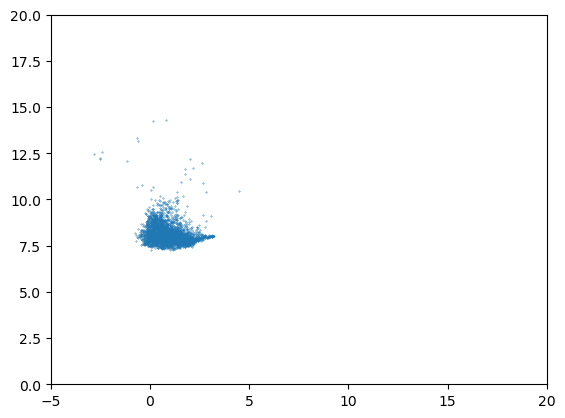

3


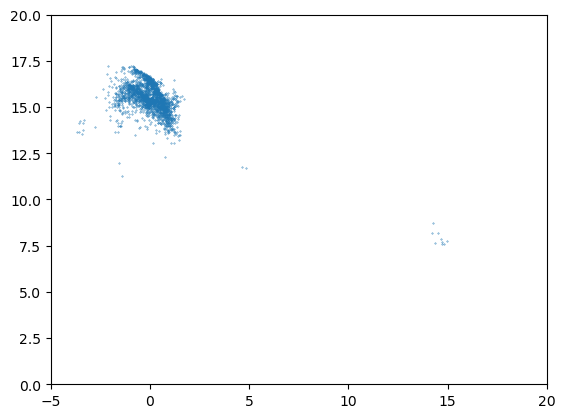

4


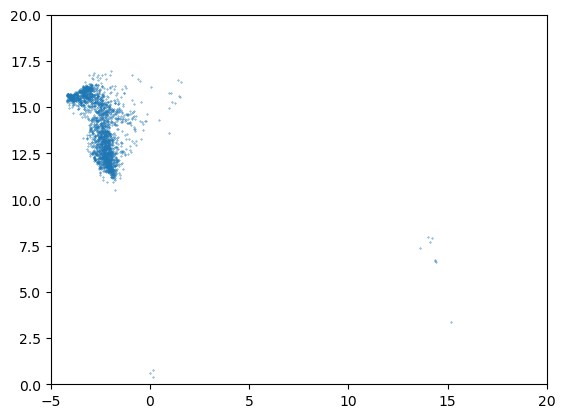

5


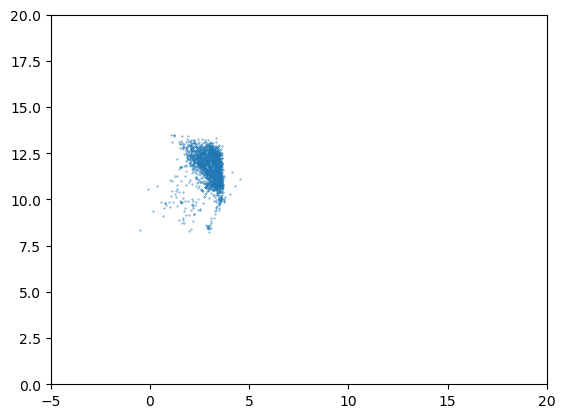

6


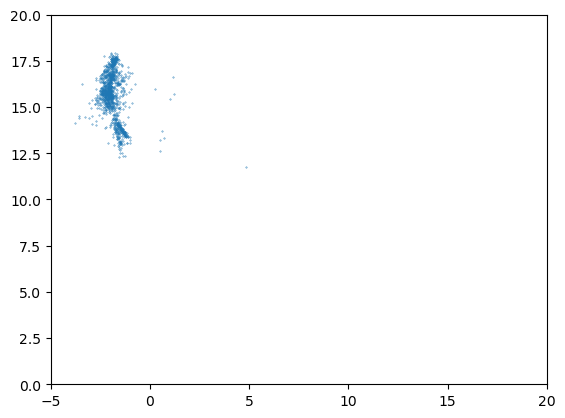

7


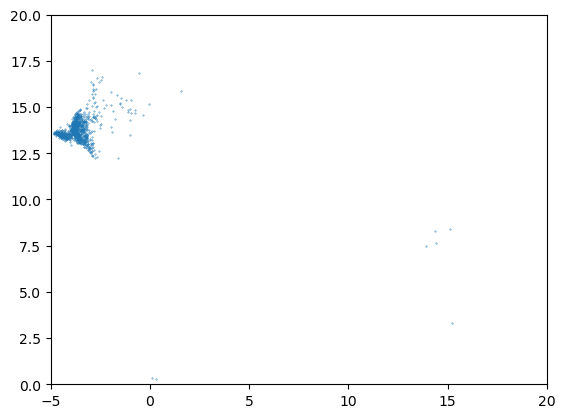

8


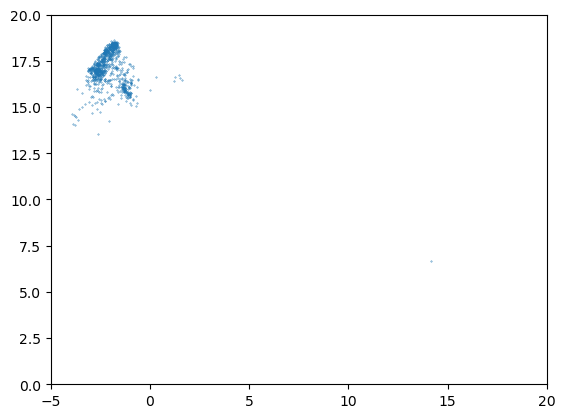

9


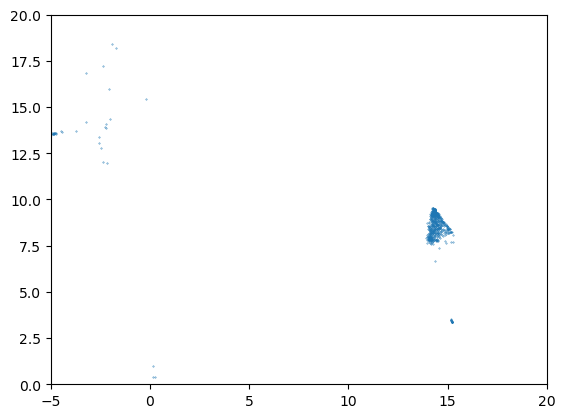

10


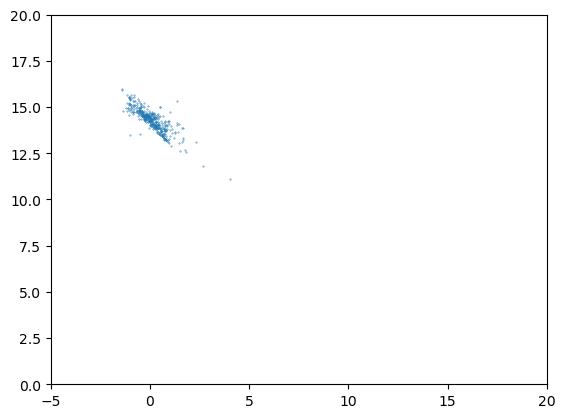

11


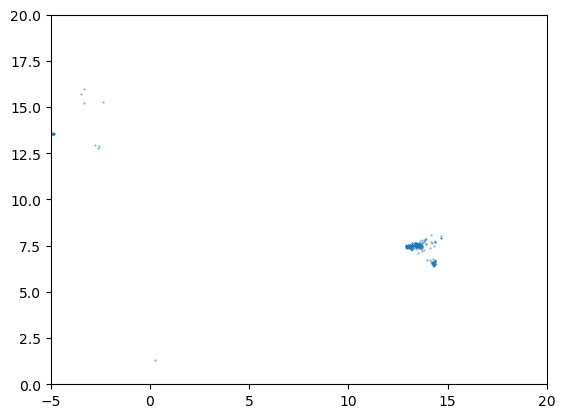

12


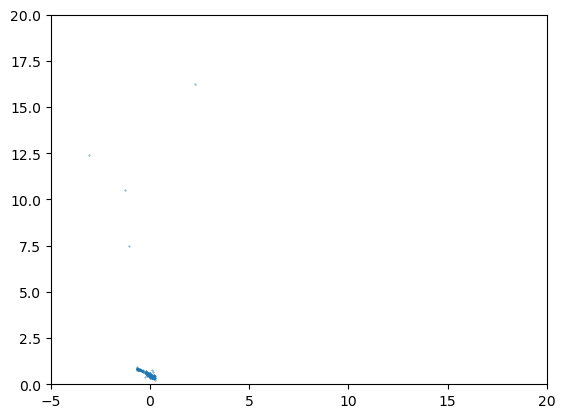

13


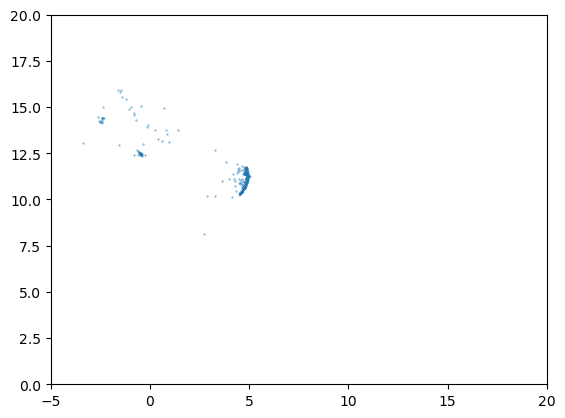

14


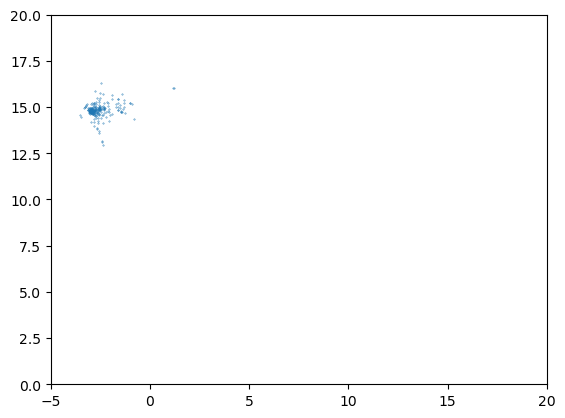

In [30]:
for i in range(15):
    print(i)
    idx = (communities.astype(int) == i)
    plt.scatter(X_ump[idx, 0], X_ump[idx, 1], s=0.1)
    plt.axis([-5, 20, 0, 20])
    plt.show()